# Data Analysis

### Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/k6/qgdgj9qj743ff3dn87fyv0yr0000gn/T/ipykernel_73294/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load the Dataset

In [4]:
df = pd.read_csv("data/team_stats_2003_2023.csv")

## Data Exploration

1. Structure of the data set

In [21]:
df.shape

df.head(10)


(672, 33)

2. Check for Null Values

In [6]:
df.isna().sum()

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64

## Data Cleaning

It seems like only have two columns with null values, mov, and ties. As I don't intend to use data from either of these columns, I will drop them.

In [7]:
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   g                     672 non-null    int64  
 9   total_yards           672 non-null    int64  
 10  plays_offense         672 non-null    int64  
 11  yds_per_play_offense  672 non-null    float64
 12  turnovers             672 non-null    int64  
 13  fumbles_lost          672 non-null    int64  
 14  first_down            672 non-null    int64  
 15  pass_cmp              6

There really isn't much cleaning needed here, all strings are properly formatted, I have removed all null values, and each entry is a seperate team or season so duplicates aren't a problem.

## Exploratory Data Analysis

### 1. Shape

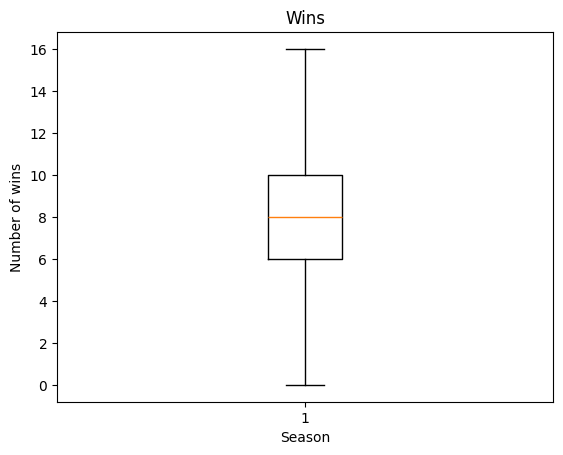

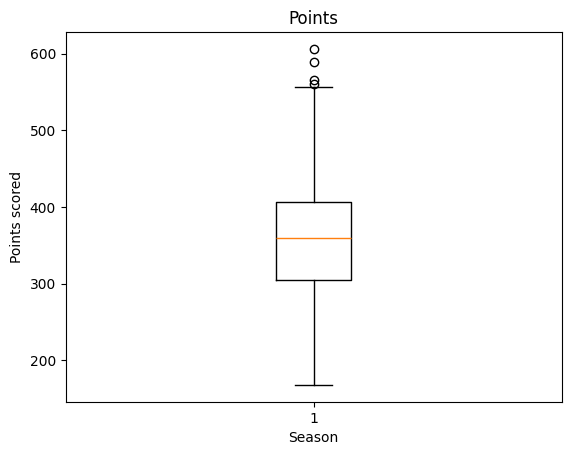

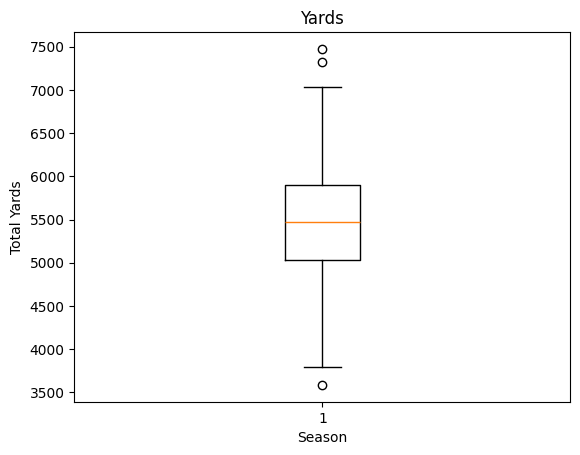

In [23]:
# Shape of the Wins Collumn
plt.boxplot(df["wins"])
plt.title("Wins")
plt.xlabel("Season")
plt.ylabel("Number of wins")
plt.show()

# Shape of the Points Collumn
plt.boxplot(df["points"])
plt.title("Points")
plt.xlabel("Season")
plt.ylabel("Points scored")
plt.show()

# Shape of the Points Collumn
plt.boxplot(df["total_yards"])
plt.title("Yards")
plt.xlabel("Season")
plt.ylabel("Total Yards")
plt.show()

The data for points and wins seems to be in order, there are no outliers for the wins collumn, and only a few in the points collumn, but the data is accurate (The 2013 Broncos did score 606 points in one season), no reason to modify the data.

General distribution data:

In [20]:
# General distribution data for the wins collumn
data = {}
data["mean"] = df["wins"].mean()
data["mode"] = df["wins"].mode()
data["median"] = df["wins"].median()
data["max"] = df["wins"].max()
data["min"] = df["wins"].min()
data["std"] = df["wins"].std()
data["range"] = df["wins"].max() - df["wins"].min()

print(data)

data = {}
data["mean"] = df["points"].mean()
data["mode"] = df["points"].mode()
data["median"] = df["points"].median()
data["max"] = df["points"].max()
data["min"] = df["points"].min()
data["std"] = df["points"].std()
data["range"] = df["points"].max() - df["points"].min()

print(data)

data = {}
data["mean"] = df["total_yards"].mean()
data["mode"] = df["total_yards"].mode()
data["median"] = df["total_yards"].median()
data["max"] = df["total_yards"].max()
data["min"] = df["total_yards"].min()
data["std"] = df["total_yards"].std()
data["range"] = df["total_yards"].max() - df["total_yards"].min()

print(data)

{'mean': 8.050595238095237, 'mode': 0    7
Name: wins, dtype: int64, 'median': 8.0, 'max': 16, 'min': 0, 'std': 3.0932549479042892, 'range': 16}
{'mean': 358.63392857142856, 'mode': 0    379
1    391
Name: points, dtype: int64, 'median': 359.0, 'max': 606, 'min': 168, 'std': 72.09205022439534, 'range': 438}
{'mean': 5463.895833333333, 'mode': 0     4951
1     5035
2     5225
3     5361
4     5423
5     5458
6     5542
7     5618
8     5772
9     5820
10    6145
11    6366
Name: total_yards, dtype: int64, 'median': 5467.5, 'max': 7474, 'min': 3587, 'std': 628.2094664150584, 'range': 3887}


# Statistical Analysis

## Question 1: Which teams have the most and least wins overall?

In [10]:
# Finds the total number of wins each team has

total_wins = {}

def find_wins(name) :
    new = df.loc[df["team"] == name]
    total_wins[name] = new["wins"].sum()

teams_arr = df.loc[df["year"] == 2003]
for i in teams_arr["team"] :
    find_wins(i)


max = "New England Patriots"
for i in total_wins :
    if total_wins[i] > total_wins[max]:
        max = i


min = "New England Patriots"
for i in total_wins :
    if total_wins[i] < total_wins[max]:
        max = i

print(max)
print(total_wins[max])
print(min)
print(total_wins[min])



St. Louis Rams
76
New England Patriots
241


The team with the most wins since 2003 has been the New England Patriots with 241, and the least successful as been the St. Louis Rams with 76 Wins

# Question 2: Which teams have been the most and least successful in points

In [11]:
# Finds the total number of points scored by each team

total_points = {}

def find_points(name) :
    new = df.loc[df["team"] == name]
    total_points[name] = new["points"].sum()

teams_arr = df.loc[df["year"] == 2003]
for i in teams_arr["team"] :
    find_points(i)


max = "New England Patriots"
for i in total_points :
    if total_points[i] > total_points[max]:
        max = i


min = "New England Patriots"
for i in total_wins :
    if total_points[i] < total_points[max]:
        max = i

print(max)
print(total_points[max])
print(min)
print(total_points[min])

St. Louis Rams
3899
New England Patriots
9083


While it makes some sense that the teams with the most and least wins would be the same as the teams with the most and least points, I found it kind of suprising. The team with the least points was the St. Louis Rams with 3899, and the team with the most points was the Patriots with 9083.

# Question 3: Which team had the least average yards per touchdown?

In [16]:
# Finds the total yards and winds of each team and stores them in dictionaries

total_wins = {}
total_yards = {}

def find_wins(name) :
    new = df.loc[df["team"] == name]
    total_wins[name] = new["wins"].sum()

teams_arr = df.loc[df["year"] == 2003]
for i in teams_arr["team"] :
    find_wins(i)

def find_yards(name) :
    new = df.loc[df["team"] == name]
    total_yards[name] = new["total_yards"].sum()

for i in teams_arr["team"] :
    find_yards(i)


# Divides the two values in order to get the ratio of yards to touchdowns
    
ratios = {}

for i in teams_arr["team"] :
    ratios[i] = (total_yards[i] / total_wins[i])

min = "New England Patriots"
max = "New England Patriots"

for i in ratios:
    if ratios[i] < ratios[min] :
        min = i
    if ratios[i] > ratios[max] :
        max = i


print(max)
print(ratios[max])
print(min)
print(ratios[min])






Oakland Raiders
942.8695652173913
New England Patriots
513.6307053941908


The team with the highest yards : touchdown ratio was the Oakland raiders with around 943 yards per touchdown, and the New England Patriots had the lowest with around 514 yards per touchdown.